## Import

In [21]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
import numpy as np
import datetime

## Get Page

### Get Single Page

In [125]:
def get(location, page_num):
    headers = {
        'accept': 'application/json',
        'accept-language': 'zh-CN,zh;q=0.9,en;q=0.8,en-GB;q=0.7,en-US;q=0.6',
        'if-modified-since': 'Sun, 29 Sep 2024 23:57:21 GMT',
        'origin': 'https://afdc.energy.gov',
        'priority': 'u=1, i',
        'referer': 'https://afdc.energy.gov/',
        'sec-ch-ua': '"Microsoft Edge";v="129", "Not=A?Brand";v="8", "Chromium";v="129"',
        'sec-ch-ua-mobile': '?0',
        'sec-ch-ua-platform': '"Windows"',
        'sec-fetch-dest': 'empty',
        'sec-fetch-mode': 'cors',
        'sec-fetch-site': 'cross-site',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36 Edg/129.0.0.0',
    }
    
    params = {
        'api_key': 'w30dJhEvcdCHxEHImCSL0GIAXETjLIJ41lgoN0Jr',
        'country': 'all',
        'maximum_vehicle_class': 'all',
        'owner_type': 'all',
        'cards_accepted': 'all',
        'offset': str(200 * (page_num - 1)),
        'fuel_type': 'ELEC',
        'access': 'public',
        'status': 'E',
        'cng_fill_type': 'all',
        'cng_has_rng': 'all',
        'cng_psi': 'all',
        'ev_charging_level': 'all',
        'ev_connector_type': 'all',
        'ev_network': 'all',
        'funding_sources': 'all',
        'e85_has_blender_pump': 'false',
        'lng_has_rng': 'all',
        'hy_is_retail': 'true',
        'lpg_include_secondary': 'false',
        'location': location,
        'radius': 'infinite',
        'limit': '200',
    }
    
    response = requests.get('https://developer.nrel.gov/api/alt-fuel-stations/v1/nearest.json', params=params, headers=headers)
    data = response.json()['fuel_stations']
    name_list = []
    phone_list = []
    facility_list = []
    access_list = []
    time_list = []
    date_list = []
    number_list = []
    fuel_type_list = []
    id_list = []
    street_list = []
    city_list = []
    zip_list = []
    longitude_list = []
    latitude_list = []
    for station in data:
        if station['state'] == 'PA':
            name_list.append(station['station_name'])
            phone_list.append(station['station_phone'])
            facility_list.append(station['facility_type'])
            access_list.append(station['access_code'])
            time_list.append(station['access_days_time'])
            date_list.append(station['open_date'])
            number = station['ev_dc_fast_num'] if station['ev_dc_fast_num'] is not None else 0
            number += station['ev_level1_evse_num'] if station['ev_level1_evse_num'] is not None else 0
            number += station['ev_level2_evse_num'] if station['ev_level2_evse_num'] is not None else 0
            number_list.append(number)
            fuel_type_list.append(station['fuel_type_code'])
            id_list.append(station['id'])
            street_list.append(station['street_address'])
            city_list.append(station['city'])
            zip_list.append(station['zip'])
            longitude_list.append(station['longitude'])
            latitude_list.append(station['latitude'])
    station_dict = {
        'id': id_list,
        'Name': name_list,
        'Phone': phone_list,
        'Facility': facility_list,
        'Access': access_list,
        'Access Time': time_list,
        'Open Date': date_list,
        'Number': number_list,
        'Fuel Type': fuel_type_list,
        'Street Address': street_list,
        'City': city_list,
        'Zip': zip_list,
        'Longitude': longitude_list,
        'Latitude': latitude_list
    }
    station_df = pd.DataFrame.from_dict(station_dict)
    return station_df

In [126]:
res = get('pennsylvania', 1)
res

,id,Name,Phone,Facility,Access,Access Time,Open Date,Number,Fuel Type,Street Address,City,Zip,Longitude,Latitude
0,205834,TRANSIT PARK TRANSIT PARK#1,888-758-4389,None,public,24 hours daily,2022-02-04,2,ELEC,811 Market St,Harrisburg,17105,-76.876648,40.262885
1,175684,TRANSIT PARK TRANSIT PARK#2,888-758-4389,None,public,24 hours daily,2021-01-27,2,ELEC,811 Market St,Harrisburg,17105,-76.876750,40.263017
2,175089,3RD AND NORTH STATION 2,888-758-4389,None,public,24 hours daily,2021-01-27,2,ELEC,700 N 3rd St,Harrisburg,17102,-76.885680,40.265344
3,153265,3RD AND NORTH STATION 1,888-758-4389,None,public,24 hours daily,2020-02-04,2,ELEC,700 N 3rd St,Harrisburg,17102,-76.885691,40.265340
4,175091,3RD AND NORTH STATION 4,888-758-4389,None,public,24 hours daily,2021-01-27,2,ELEC,700 N 3rd St,Harrisburg,17102,-76.885691,40.265385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,155464,MYERSTOWN BORO MYERSTOWN STA1,888-758-4389,None,public,24 hours daily,2020-04-21,2,ELEC,6 E Main Ave,Myerstown,17067,-76.302938,40.375266
196,306624,Weaver Road Athletic Complex,None,REC_SPORTS_FACILITY,public,24 hours daily,2023-08-09,2,ELEC,2883 Weaver Rd,Lancaster,17601,-76.316134,40.102531
197,350006,Flying J 518,877-455-3833,None,public,24 hours daily,2024-07-04,4,ELEC,2210 Camp Swatara Rd,Frystown,17067,-76.339716,40.463446
198,186627,RAILROAD STATION 1,888-758-4389,None,public,24 hours daily,2021-03-27,2,ELEC,15 N Railroad St,Hanover,17331,-76.983121,39.801662


### Get All Page

In [127]:
def get_all(location):
    total_df = None
    i = 1
    while True:
        result_df = get(location, i)
        print(f'Currently processing page {i}: {(i - 1) * 200 + 1}~{i * 200}')
        if len(result_df) == 0:
            break
        total_df = pd.concat([total_df, result_df], axis=0)
        print(f'Processing finished page {i}: {(i - 1) * 200 + 1}~{i * 200}\n')
        i += 1
    return total_df

In [128]:
total_df = get_all('pittsburgh')
display(total_df)

Currently processing page 1: 1~200
Processing finished page 1: 1~200

Currently processing page 2: 201~400
Processing finished page 2: 201~400

Currently processing page 3: 401~600
Processing finished page 3: 401~600

Currently processing page 4: 601~800
Processing finished page 4: 601~800

Currently processing page 5: 801~1000
Processing finished page 5: 801~1000

Currently processing page 6: 1001~1200
Processing finished page 6: 1001~1200

Currently processing page 7: 1201~1400
Processing finished page 7: 1201~1400

Currently processing page 8: 1401~1600
Processing finished page 8: 1401~1600

Currently processing page 9: 1601~1800
Processing finished page 9: 1601~1800

Currently processing page 10: 1801~2000
Processing finished page 10: 1801~2000

Currently processing page 11: 2001~2200
Processing finished page 11: 2001~2200

Currently processing page 12: 2201~2400
Processing finished page 12: 2201~2400

Currently processing page 13: 2401~2600
Processing finished page 13: 2401~2600



,id,Name,Phone,Facility,Access,Access Time,Open Date,Number,Fuel Type,Street Address,City,Zip,Longitude,Latitude
0,81613,Oxford Center Garage,800-128-4567,PARKING_GARAGE,public,8am-6pm daily,2017-02-01,2,ELEC,301 Grant St,Pittsburgh,15219,-79.998858,40.438052
1,174880,ONEOXFORDCENTRE STATION 3,888-758-4389,None,public,24 hours daily,2021-01-27,2,ELEC,339 Cherry Way,Pittsburgh,15219,-79.999009,40.437939
2,174881,ONEOXFORDCENTRE STATION 2,888-758-4389,None,public,24 hours daily,2021-01-27,2,ELEC,339 Cherry Way,Pittsburgh,15219,-79.999038,40.437957
3,150792,ONEOXFORDCENTRE STATION 4,888-758-4389,None,public,24 hours daily,2019-12-24,2,ELEC,339 Cherry Way,Pittsburgh,15219,-79.999039,40.437941
4,174882,ONEOXFORDCENTRE STATION 1,888-758-4389,None,public,24 hours daily,2021-01-27,2,ELEC,339 Cherry Way,Pittsburgh,15219,-79.999081,40.437991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,47771,Maguire's Nissan - Lebanon,717-272-7671,CAR_DEALER,public,Dealership business hours,2012-01-31,1,ELEC,2001 Cumberland St,Lebanon,17042,-76.447073,40.338996
5,326592,Whitmoyer Chevrolet Mount Joy,866-816-7584,None,public,24 hours daily,2024-01-25,1,ELEC,1001 E Main St,Mount Joy,17552,-76.476623,40.110701
6,335693,BENNETT HYUNDAI DC 1,888-758-4389,None,public,24 hours daily,2024-05-07,1,ELEC,1820 Cumberland St,Lebanon,17042,-76.443068,40.337880
7,353159,BENNETT HYUNDAI SERVICE 1,888-758-4389,None,public,24 hours daily,2024-08-21,2,ELEC,1820 Cumberland St,Lebanon,17042,-76.442885,40.337896


In [129]:
total_df = total_df.dropna(subset=['Open Date'], axis=0)
# total_df = total_df.fillna({"Number": 1})
total_df.to_csv('./stations.csv', index=False)

### Time Filter

In [130]:
def time_filter(data, start_date=datetime.datetime(2014, 1, 1), end_date=datetime.datetime(2024, 8, 30)):
    data['Open Date'] = data['Open Date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))
    data['Year'] = data['Open Date'].apply(lambda x: x.year)
    data['Month'] = data['Open Date'].apply(lambda x: x.month)
    result = []
    for year in range(start_date.year, end_date.year + 1):
        for month in range(1, 13):
            result.append(datetime.datetime(year, month, 1))
    i = len(result) - 1
    while result[i] > end_date:
        result = result[:-1]
        i -= 1
    data_group = data.groupby(by=['Year', 'Month']).agg({'Number': 'sum'})
    data_group = data_group.cumsum(axis=0)
    curr_year, curr_month = list(data_group.index)[0]
    while datetime.datetime(curr_year, curr_month, 1) < start_date:
        curr_month += 1
        if curr_month == 13:
            curr_month = 1
            curr_year += 1
    numbers = []
    for date in result:
        if (date.year, date.month) in data_group.index:
            numbers.append(data_group.loc[(date.year, date.month)])
        else:
            year, month = date.year, date.month
            while (year, month) not in data_group.index:
                month += 1
                if month == 13:
                    month = 1
                    year += 1
            numbers.append(data_group.loc[(year, month)])
    return pd.DataFrame([int(number) for number in numbers], index=result, columns=['Number'])

total_df = pd.read_csv('./stations.csv')
time_filter(total_df)

C:\Users\fuym20\AppData\Local\Temp\ipykernel_15820\213127666.py:33: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  return pd.DataFrame([int(number) for number in numbers], index=result, columns=['Number'])


,Number
2014-01-01,58
2014-02-01,61
2014-03-01,85
2014-04-01,85
2014-05-01,97
...,...
2024-04-01,1814
2024-05-01,1889
2024-06-01,1895
2024-07-01,1941


In [22]:
datetime.datetime(2014, 1, 1) < datetime.datetime(2015, 1, 1)

True

## Get Number

### For Check

In [36]:
def get_number_spec(location, page_num):
    headers = {
        'accept': 'application/json',
        'accept-language': 'zh-CN,zh;q=0.9,en;q=0.8,en-GB;q=0.7,en-US;q=0.6',
        'if-modified-since': 'Sun, 29 Sep 2024 23:57:21 GMT',
        'origin': 'https://afdc.energy.gov',
        'priority': 'u=1, i',
        'referer': 'https://afdc.energy.gov/',
        'sec-ch-ua': '"Microsoft Edge";v="129", "Not=A?Brand";v="8", "Chromium";v="129"',
        'sec-ch-ua-mobile': '?0',
        'sec-ch-ua-platform': '"Windows"',
        'sec-fetch-dest': 'empty',
        'sec-fetch-mode': 'cors',
        'sec-fetch-site': 'cross-site',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36 Edg/129.0.0.0',
    }
    
    params = {
        'api_key': 'w30dJhEvcdCHxEHImCSL0GIAXETjLIJ41lgoN0Jr',
        'country': 'all',
        'maximum_vehicle_class': 'all',
        'owner_type': 'all',
        'cards_accepted': 'all',
        'offset': str(200 * (page_num - 1)),
        'fuel_type': 'ELEC',
        'access': 'public',
        'status': 'E',
        'cng_fill_type': 'all',
        'cng_has_rng': 'all',
        'cng_psi': 'all',
        'ev_charging_level': '2,dc_fast',
        'ev_connector_type': 'all',
        'ev_network': 'all',
        'funding_sources': 'all',
        'e85_has_blender_pump': 'false',
        'lng_has_rng': 'all',
        'hy_is_retail': 'true',
        'lpg_include_secondary': 'false',
        'location': location,
        'radius': 'infinite',
        'limit': '200',
    }
    response = requests.get('https://developer.nrel.gov/api/alt-fuel-stations/v1/nearest.json', params=params, headers=headers)
    data = response.json()['fuel_stations']
    return len(data)

def get_number(location):
    i = 1
    ans = 0
    while True:
        res = get_number_spec(location, i)
        if res > 0:
            ans += res
            i += 1
        else:
            break
    return ans

get_number('pittsburgh')

78735

### Simple Way

In [15]:
def get_total_number(location):
    headers = {
        'accept': 'application/json',
        'accept-language': 'zh-CN,zh;q=0.9,en;q=0.8,en-GB;q=0.7,en-US;q=0.6',
        'if-modified-since': 'Sun, 29 Sep 2024 23:57:21 GMT',
        'origin': 'https://afdc.energy.gov',
        'priority': 'u=1, i',
        'referer': 'https://afdc.energy.gov/',
        'sec-ch-ua': '"Microsoft Edge";v="129", "Not=A?Brand";v="8", "Chromium";v="129"',
        'sec-ch-ua-mobile': '?0',
        'sec-ch-ua-platform': '"Windows"',
        'sec-fetch-dest': 'empty',
        'sec-fetch-mode': 'cors',
        'sec-fetch-site': 'cross-site',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36 Edg/129.0.0.0',
    }
    
    params = {
        'api_key': 'w30dJhEvcdCHxEHImCSL0GIAXETjLIJ41lgoN0Jr',
        'country': 'all',
        'maximum_vehicle_class': 'all',
        'owner_type': 'all',
        'cards_accepted': 'all',
        'offset': 0,
        'fuel_type': 'ELEC',
        'access': 'public',
        'status': 'E',
        'cng_fill_type': 'all',
        'cng_has_rng': 'all',
        'cng_psi': 'all',
        'ev_charging_level': '2,dc_fast',
        'ev_connector_type': 'all',
        'ev_network': 'all',
        'funding_sources': 'all',
        'e85_has_blender_pump': 'false',
        'lng_has_rng': 'all',
        'hy_is_retail': 'true',
        'lpg_include_secondary': 'false',
        'location': location,
        'radius': 'infinite',
        'limit': '200',
    }
    response = requests.get('https://developer.nrel.gov/api/alt-fuel-stations/v1/nearest.json', params=params, headers=headers)
    return response.json()['total_results'], response.json()['station_counts']['total']

get_total_number('pittsburgh')

(78775, 215601)

## Plot

861


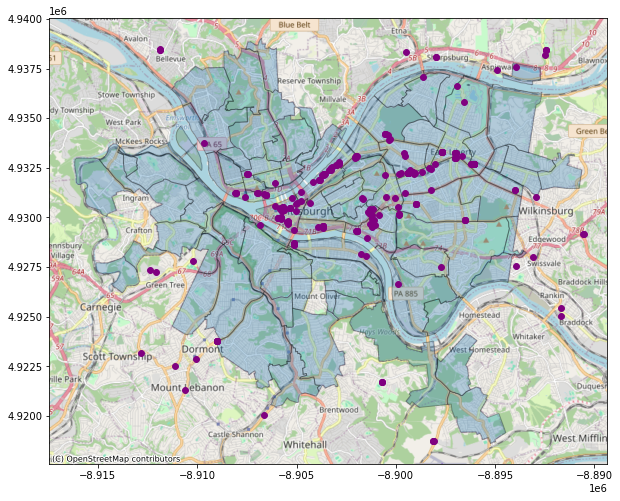

In [131]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

gdf = gpd.read_file('./Neighborhoods_.shp')
gdf = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, alpha=0.3, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

total_df = pd.read_csv('./stations.csv')
longitude, latitude = total_df['Longitude'], total_df['Latitude']
print(len(longitude))
scatter_gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(longitude, latitude), crs='EPSG:4326')
scatter_gdf.to_crs(epsg=3857).plot(ax=ax, color='purple', markersize=35)
plt.show()